In [ ]:
import os
# os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is c:\Users\blond\Documents\NssProjects\accre-green-bean-casserole


In [2]:
import pandas as pd
from scripts.get import log_to_df, df_to_datelist
from collections import Counter

In [14]:
jobs = pd.read_csv("data/fullsample.csv")
jobs['BEGIN'] = pd.to_datetime(
    jobs['BEGIN'], 
    # format = "%Y-%m-%d %H:%M:%S",
    errors='coerce'
)
jobs['END'] = pd.to_datetime(
    jobs['END'], 
    # format = "%Y-%m-%d %H:%M:%S",
    errors='coerce'
)

C:\Users\blond\AppData\Local\Temp\ipykernel_16884\1802809925.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  jobs['END'] = pd.to_datetime(


In [4]:
ce5 = log_to_df('data/slurm_wrapper_ce5.log')
ce6 = log_to_df('data/slurm_wrapper_ce6.log')
error_list = df_to_datelist(ce6) + df_to_datelist(ce5)

In [ ]:
len(error_list)

In [ ]:
error_list

In [5]:
# made new column to group the completions by 
jobs['end_day_hour'] = jobs['END'].dt.strftime('%Y-%m-%d %H')

In [6]:
# made new column to group the completions by 
error_list_hour = [x.strftime('%Y-%m-%d %H') for x in error_list]

In [7]:
error_list_hour = set(error_list_hour)

In [ ]:
error_list_hour

In [ ]:
# order by end time ascending, I dont know why I had this
# count how many jobs an hour each day
# count how many jobs by hour of the day (not grouped by day)
# count how many jobs by day of week


In [ ]:
# determines how many jobs completed each hour of each day
day_hour = jobs.groupby('end_day_hour').size()

In [ ]:
date_hour = pd.DataFrame({
    'Count': jobs.groupby('end_day_hour').size()
}).reset_index()

In [ ]:
date_hour.head()

In [ ]:
date_hour['had_error'].value_counts()

In [ ]:
# Create a new boolean column
date_hour['had_error'] = date_hour['end_day_hour'].isin(error_list_hour)

day of week stuff

In [99]:
jobs['day_of_week'] = jobs['END'].dt.day_name()


In [100]:
# determines how many jobs completed each day of the week 
j_total = jobs.groupby('day_of_week').size().sort_values().reset_index()

In [101]:
j_total = j_total.rename(columns={0: 'JobEndCount'})

In [102]:
# converts timestamp to the day of the week name
error_list_day = [x.strftime('%A') for x in error_list]

In [103]:
# counts how many times each day appears in the error list
e_total = dict(Counter(error_list_day))

In [104]:
j_total['ErrorCount'] = j_total['day_of_week'].map(e_total)

In [105]:
sorted_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
j_total['day_of_week'] = pd.Categorical(j_total['day_of_week'], categories=sorted_weekdays, ordered=True)
j_total = j_total.sort_values('day_of_week')

In [106]:
j_total

,day_of_week,JobEndCount,ErrorCount
4,Monday,1120898,548
6,Tuesday,1300031,391
5,Wednesday,1182419,550
3,Thursday,1033677,405
2,Friday,1027294,677
0,Saturday,848092,408
1,Sunday,882823,317


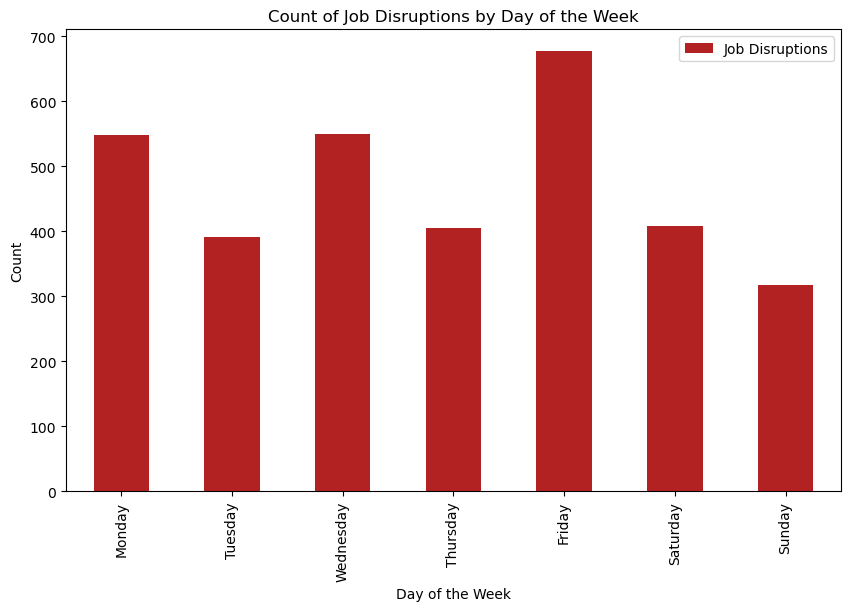

In [126]:

j_total.plot(x='day_of_week', y=['ErrorCount'], kind='bar', figsize=(10, 6), color = 'firebrick')
plt.legend(['Job Disruptions'])
plt.title('Count of Job Disruptions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Display the plot
plt.show()

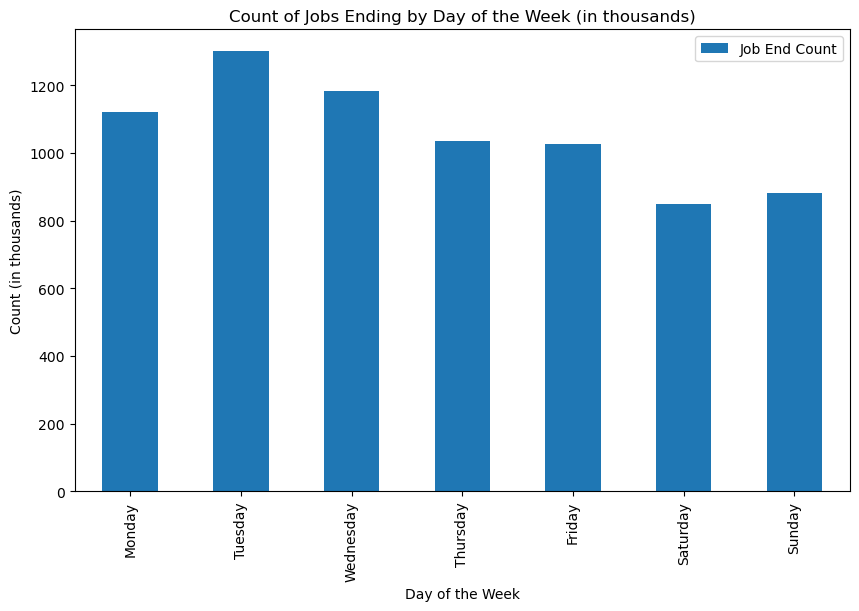

In [ ]:
# made a new column to divide by 1000
j_total['Job End Count'] = j_total['JobEndCount'] / 1000
j_total.plot(x='day_of_week', y=['Job End Count'], kind='bar', figsize=(10, 6))
plt.title('Count of Jobs Ending by Day of the Week (in thousands)')
plt.xlabel('Day of the Week')
plt.ylabel('Count (in thousands)')

plt.show()